In [1]:
import gym
from collections import deque
import numpy as np
import time

import torch
torch.manual_seed(0) # set random seed
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from policy import Policy
from gym.wrappers.monitoring.video_recorder import VideoRecorder
# import tqdm
import pdb
import matplotlib.pyplot as plt

In [2]:
env = gym.make('Acrobot-v1')
env.seed(0)
print('observation space:', env.observation_space)
print('action space:', env.action_space)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# state_dict = torch.load('checkpoint_train2.pth')

# policy = Policy()
# policy.load_state_dict(state_dict)
# policy = policy.to(device)

policy = Policy(s_size=6, h_size=64, a_size=3).to(device)
optimizer = optim.Adam(policy.parameters(), lr=0.001)

observation space: Box(-28.274333953857422, 28.274333953857422, (6,), float32)
action space: Discrete(3)


In [3]:

print(policy)
params = list(policy.parameters())
# print(params[0].size(0))  # conv1's .weight
adummy=params[0].size(0)
print(params)

Policy(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)


In [45]:
def reinforce2(n_episodes=5000, max_t=1000, gamma=1.0, print_every=500):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _ = env.step(action)
#             env.render()
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        discounts = [gamma**i for i in range(len(rewards)+1)]
    
        G=0
        policy_loss=[]
        for i in reversed(range(len(saved_log_probs))):
            G = G + rewards[i]
            policy_loss.append(-saved_log_probs[i] * G)     
            
        policy_loss = torch.cat(policy_loss).sum()                
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        
        if i_episode % print_every == 0:
            torch.save(policy.state_dict(), 'checkpoint_{}.pth'.format(adummy))
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))        
    return scores

Episode 500	Average Score: -149.37
Episode 1000	Average Score: -139.98
Episode 1500	Average Score: -113.29
Episode 2000	Average Score: -102.78
Episode 2500	Average Score: -101.70
Episode 3000	Average Score: -96.95
Episode 3500	Average Score: -95.53
Episode 4000	Average Score: -96.42
Episode 4500	Average Score: -90.49
Episode 5000	Average Score: -85.99


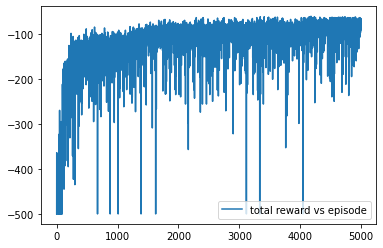

In [46]:
scores=reinforce2()
c=np.array([i for i in range(len(scores))])
plt.plot(c,scores, label ='total reward vs episode')
plt.legend()
plt.show()

Policy(
  (fc1): Linear(in_features=6, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)
Episode 500	Average Score: -500.00
Episode 1000	Average Score: -500.00
Episode 1500	Average Score: -161.76
Episode 2000	Average Score: -129.52
Episode 2500	Average Score: -117.29
Episode 3000	Average Score: -101.19
Episode 3500	Average Score: -96.46
Episode 4000	Average Score: -92.58
Episode 4500	Average Score: -87.95
Episode 5000	Average Score: -92.80


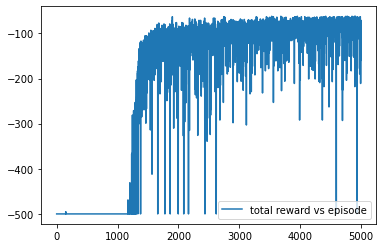

In [47]:
policy = Policy(s_size=6, h_size=128, a_size=3).to(device)
optimizer = optim.Adam(policy.parameters(), lr=0.001)

print(policy)
params = list(policy.parameters())
# print(params[0].size(0))  # conv1's .weight
adummy=params[0].size(0)

scores=reinforce2()
c=np.array([i for i in range(len(scores))])
plt.plot(c,scores, label ='total reward vs episode')
plt.legend()
plt.show()

Episode 500	Average Score: -85.70
Episode 1000	Average Score: -85.11
Episode 1500	Average Score: -86.85
Episode 2000	Average Score: -86.72
Episode 2500	Average Score: -83.83
Episode 3000	Average Score: -93.23
Episode 3500	Average Score: -83.89
Episode 4000	Average Score: -91.71
Episode 4500	Average Score: -86.96
Episode 5000	Average Score: -84.46


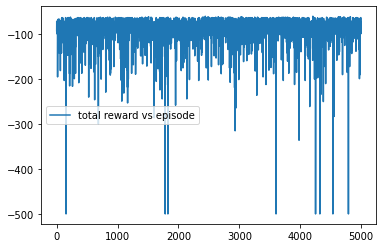

In [49]:
state_dict = torch.load('checkpoint_64.pth')

policy = Policy(s_size=6, h_size=64, a_size=3)
policy.load_state_dict(state_dict)
policy = policy.to(device)
optimizer = optim.Adam(policy.parameters(), lr=0.001)

scores=reinforce2()
c=np.array([i for i in range(len(scores))])
plt.plot(c,scores, label ='total reward vs episode')
plt.legend()
plt.show()